# 1-海伦约会

海伦使用约会网站寻找约会对象。经过一段时间之后，她发现曾交往过三种类型的人:

+ 不喜欢的人  
+ 魅力一般的人
+ 极具魅力的人

她希望:

1. 工作日与魅力一般的人约会
2. 周末与极具魅力的人约会
3. 不喜欢的人则直接排除掉

现在她收集到了一些约会网站未曾记录的数据信息( datingTestSet2.txt )，这更有助于匹配对象的归类。

## 1.1 准备数据

将txt文本数据转换为numpy的matrix数据

In [1]:
import os
import numpy as np



def file2matrix(filename:str):
    #得到文件内容
    fr=open(filename,'r')
    content=fr.readlines()
    fr.close()
    # 得到文件行数
    fr=open(filename,'r')
    numberOfLines=len(fr.readlines())
    fr.close()
    # matrix，numberOfLines * 3的0阵
    returnMat=np.zeros( (numberOfLines,3) )
    # label, numberOfLines * 1的列向量
    label=[]
    index=0
    """
        readlines方法:一次性读取整个文件；自动将文件内容分析成一个行的列表。
        str.strip() #参数默认，删除头尾空格
        str.lstrip() #删除开头空格,str.rstrip() #删除结尾空格
    """
    for line in content:
        #参数默认，删除头尾空格
        line=line.strip()
        #\t 制表符分割行数据
        listFromLine=line.split('\t')
        #feature
        returnMat[index,:]=listFromLine[0:3]
        #label
        label.append(int(listFromLine[-1]))
        index+=1
    return returnMat,label

## 1.2 数据分析

使用matplotlib画出散点图。

datingDataMat[:2]
 [[4.092000e+04 8.326976e+00 9.539520e-01]
 [1.448800e+04 7.153469e+00 1.673904e+00]]


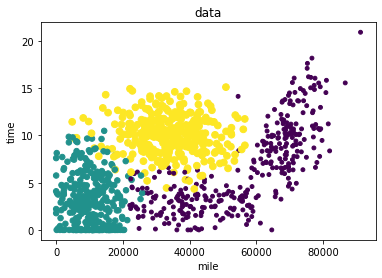

In [2]:
import matplotlib
import matplotlib.pyplot as plt 

filename="datingTestSet2.txt"
datingDataMat,datingLabels=file2matrix(filename)
print("datingDataMat[:2]\n",datingDataMat[:2])

plt.figure()
# 利用颜色和尺寸，标识数据点的属性类别
plt.scatter(datingDataMat[:, 0], datingDataMat[:, 1],15.0*np.array(datingLabels),15.0*np.array(datingLabels))
# plt.scatter(datingDataMat[:, 0], datingDataMat[:, 1])
plt.title("data")
plt.ylabel("time")
plt.xlabel("mile")
plt.show()

## 1.3 归一化数值

In [3]:
def autoNorm(dateSet:np.ndarray):
    # 取dateset的每列的最小值，为np.ndarray类型
    minVals=dateSet.min(0)
    # 取dateset的每列的最大值
    maxVals=dateSet.max(0)
    # 归一化矩阵
    normMat=np.zeros( np.shape(dateSet) )
    # 广播
    normMat=(dateSet-minVals)/(maxVals-minVals)
    return normMat

## 1.4 KNN算法

对于每一个在数据集中的数据点: 

    计算目标的数据点（需要分类的数据点）与该数据点的距离

    将距离排序: 从小到大

    选取前K个最短距离

    选取这K个中最多的分类类别
    
    返回该类别来作为目标数据点的预测值

In [4]:
def calcDist(x1,x2):
    # 距离度量：欧式距离
    return np.sqrt(np.sum(np.square(x1-x2)))

def getCls(x,dataSet,labels,k):
    # 样本距离
    distList=[0]*len(dataSet)
    # 遍历训练集，计算距离
    for i in range(len(dataSet)):
        # 训练集样本
        x1=dataSet[i]
        # 距离
        dist=calcDist(x,x1)
        # 保存距离
        distList[i]=dist
    # 使用np.argsort()，该函数按值排序，返回索引号序列
    topKList=np.argsort(np.array(distList))[:k]
    # 投票,假设最多有10个类别
    labelList=[0]*10
    for index in topKList:
        tickit=int(labels[index])
        labelList[tickit]+=1
    # 返回索引，即为预测
    return labelList.index(max(labelList)) 


## 1.4 测试

使用海伦提供的部分数据作为测试样本。

测试样本和非测试样本的区别在于: 

测试样本是已经完成分类的数据，如果预测分类与实际类别不同，则标记为一个错误。


In [5]:
def datingClassTest(datingDataMat,datingLabels):
    # 归一化
    normMat=autoNorm(datingDataMat)
    # 记录错误数
    errorCnt=0
    # 设置测试数据比例
    ratio=0.1
    # 测试数据数量
    total=int(ratio*len(datingLabels))
    for i in range(total):
        print('test %d:%d'%(i,total))
        # 测试向量
        x=normMat[i]
        # 获取预测的label
        y=getCls(x,normMat,datingLabels,10)
        # 统计error
        if y!=datingLabels[i]:
            errorCnt+=1
    # return 正确率
    return 1-(errorCnt/total)

In [9]:
# 加载数据
datingDataMat,datingLabels=file2matrix("./datingTestSet2.txt")
# 计算正确率
datingClassTest()

test 0:100
test 1:100
test 2:100
test 3:100
test 4:100
test 5:100
test 6:100
test 7:100
test 8:100
test 9:100
test 10:100
test 11:100
test 12:100
test 13:100
test 14:100
test 15:100
test 16:100
test 17:100
test 18:100
test 19:100
test 20:100
test 21:100
test 22:100
test 23:100
test 24:100
test 25:100
test 26:100
test 27:100
test 28:100
test 29:100
test 30:100
test 31:100
test 32:100
test 33:100
test 34:100
test 35:100
test 36:100
test 37:100
test 38:100
test 39:100
test 40:100
test 41:100
test 42:100
test 43:100
test 44:100
test 45:100
test 46:100
test 47:100
test 48:100
test 49:100
test 50:100
test 51:100
test 52:100
test 53:100
test 54:100
test 55:100
test 56:100
test 57:100
test 58:100
test 59:100
test 60:100
test 61:100
test 62:100
test 63:100
test 64:100
test 65:100
test 66:100
test 67:100
test 68:100
test 69:100
test 70:100
test 71:100
test 72:100
test 73:100
test 74:100
test 75:100
test 76:100
test 77:100
test 78:100
test 79:100
test 80:100
test 81:100
test 82:100
test 83:100
te

0.96

## 1.5 约会网站预测函数


In [10]:
def classifyPerson():
    resultList = ['not at all', 'in small doses', 'in large doses']
    # 输入数据
    percentTats = float(input("percentage of time spent playing video games ?"))
    ffMiles = float(input("frequent filer miles earned per year?"))
    iceCream = float(input("liters of ice cream consumed per year?"))
    # 处理
    # 加载数据集
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    # 归一化数据集
    normMat= autoNorm(datingDataMat)
    inArr = np.array([ffMiles, percentTats, iceCream])
    classifierResult = getCls(inArr,normMat,datingLabels, 3)
    print("You will probably like this person: ", resultList[classifierResult - 1])

In [11]:
classifyPerson()

You will probably like this person:  not at all


# 2-手写数字识别系统

构造一个能识别数字 0 到 9 的基于 KNN 分类器的手写数字识别系统。

需要识别的数字是存储在文本文件中的具有相同的色彩和大小: 宽高是 32 像素 * 32 像素的黑白图像。

## 2.1 数据处理

将图像文本转为分类器使用的向量格式

In [12]:
def img2vec(filename):
    # 读文件
    fr=open(filename)
    # 向量
    returnVec=np.zeros((1,1024))
    for i in range(32):
        line=fr.readline()
        for j in range(32):
            returnVec[0,32*i+j]=int(line[j])
    return returnVec

测试

In [13]:
testVec=img2vec("./digits/testDigits/0_13.txt")
testVec[0,0:32]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## 2.2 生成训练集

In [38]:
# 加载数据
# datingDataMat,datingLabels=file2matrix("./datingTestSet2.txt")
# 计算正确率
# datingClassTest()

def geneDataSet(dirname):
    # 加载图像文本文件
    fileList=os.listdir(dirname)
    # 样本个数
    numberOfData=len(fileList)
    # 生成向量数据集
    dataSetMat=np.zeros((numberOfData,1024))
    # labels
    dataSetlabels=np.zeros((numberOfData,1))
    for i in range(numberOfData):
        fileName=fileList[i]
        # label
        classStr=int(fileName.split('_')[0])
        # datingLabels.append(classStr)
        dataSetMat[i,:]=classStr
        # 将32 *32 矩阵转为1*1024的矩阵
        dataSetMat[i,:]=img2vec(dirname+'/'+fileName)
    return dataSetMat,dataSetlabels

In [39]:

dataSetMat,dataSetlabels=geneDataSet('./digits/testDigits')


In [40]:
dataSetMat[:2]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
t=np.array(dataSetlabels[:2])
t

array([[0.],
       [0.]])

In [44]:
def dataClassTest(dataSetMat,dataSetlabels):
    # 记录错误数
    errorCnt=0
    # 设置测试数据比例
    ratio=0.5
    # 测试数据数量
    total=int(ratio*len(dataSetMat))
    for i in range(total):
        print('test %d:%d'%(i,total))
        # 测试向量
        x=dataSetMat[i]
        # 获取预测的label
        y=getCls(x,dataSetMat,dataSetlabels,10)
        # 统计error
        if y!=dataSetlabels[i]:
            errorCnt+=1
    # return 正确率
    return 1-(errorCnt/total)


In [45]:
dataClassTest(dataSetMat,dataSetlabels)

test 0:106
test 1:106
test 2:106
test 3:106
test 4:106
test 5:106
test 6:106
test 7:106
test 8:106
test 9:106
test 10:106
test 11:106
test 12:106
test 13:106
test 14:106
test 15:106
test 16:106
test 17:106
test 18:106
test 19:106
test 20:106
test 21:106
test 22:106
test 23:106
test 24:106
test 25:106
test 26:106
test 27:106
test 28:106
test 29:106
test 30:106
test 31:106
test 32:106
test 33:106
test 34:106
test 35:106
test 36:106
test 37:106
test 38:106
test 39:106
test 40:106
test 41:106
test 42:106
test 43:106
test 44:106
test 45:106
test 46:106
test 47:106
test 48:106
test 49:106
test 50:106
test 51:106
test 52:106
test 53:106
test 54:106
test 55:106
test 56:106
test 57:106
test 58:106
test 59:106
test 60:106
test 61:106
test 62:106
test 63:106
test 64:106
test 65:106
test 66:106
test 67:106
test 68:106
test 69:106
test 70:106
test 71:106
test 72:106
test 73:106
test 74:106
test 75:106
test 76:106
test 77:106
test 78:106
test 79:106
test 80:106
test 81:106
test 82:106
test 83:106
te

1.0